# 全体像

## ◆今回のハンズオンの流れ
1.   PDFをPythonでデータ化する（ソフトウェアで扱える形にする）
2.   データ化したPDFを、ベクトルに変換する
3.  OpenAIのAPIと組み合わせて、RAG機能を実装する。

## ◆目的
*   細かいコードの中身の理解 ＜ **テクノロジーを使うイメージを掴む**

## ◆操作方法
*   左にある▷を順に押していってください
*   ✔マークが出てきたら、成功しています。





# ハンズオン開始

## **1.PDFをPythonでデータ化（ソフトウェアで扱える形）にする**

## PDFをデータ化するために必要なソフトウェアを呼び寄せる

In [ ]:
pip install pdfminer

In [ ]:
# 接続テスト
from pdfminer.pdfinterp import PDFResourceManager
rmgr = PDFResourceManager()

In [ ]:
# 必要なPdfminer.sixモジュールのクラスをインポート
from pdfminer.pdfinterp import PDFResourceManager
from pdfminer.converter import TextConverter
from pdfminer.pdfinterp import PDFPageInterpreter
from pdfminer.pdfpage import PDFPage
from pdfminer.layout import LAParams
from io import StringIO

## 今回データ化（解析する）する対象のPDFを、Google Colabにアップロードする

## ①Google Colabのファイルマークをクリック

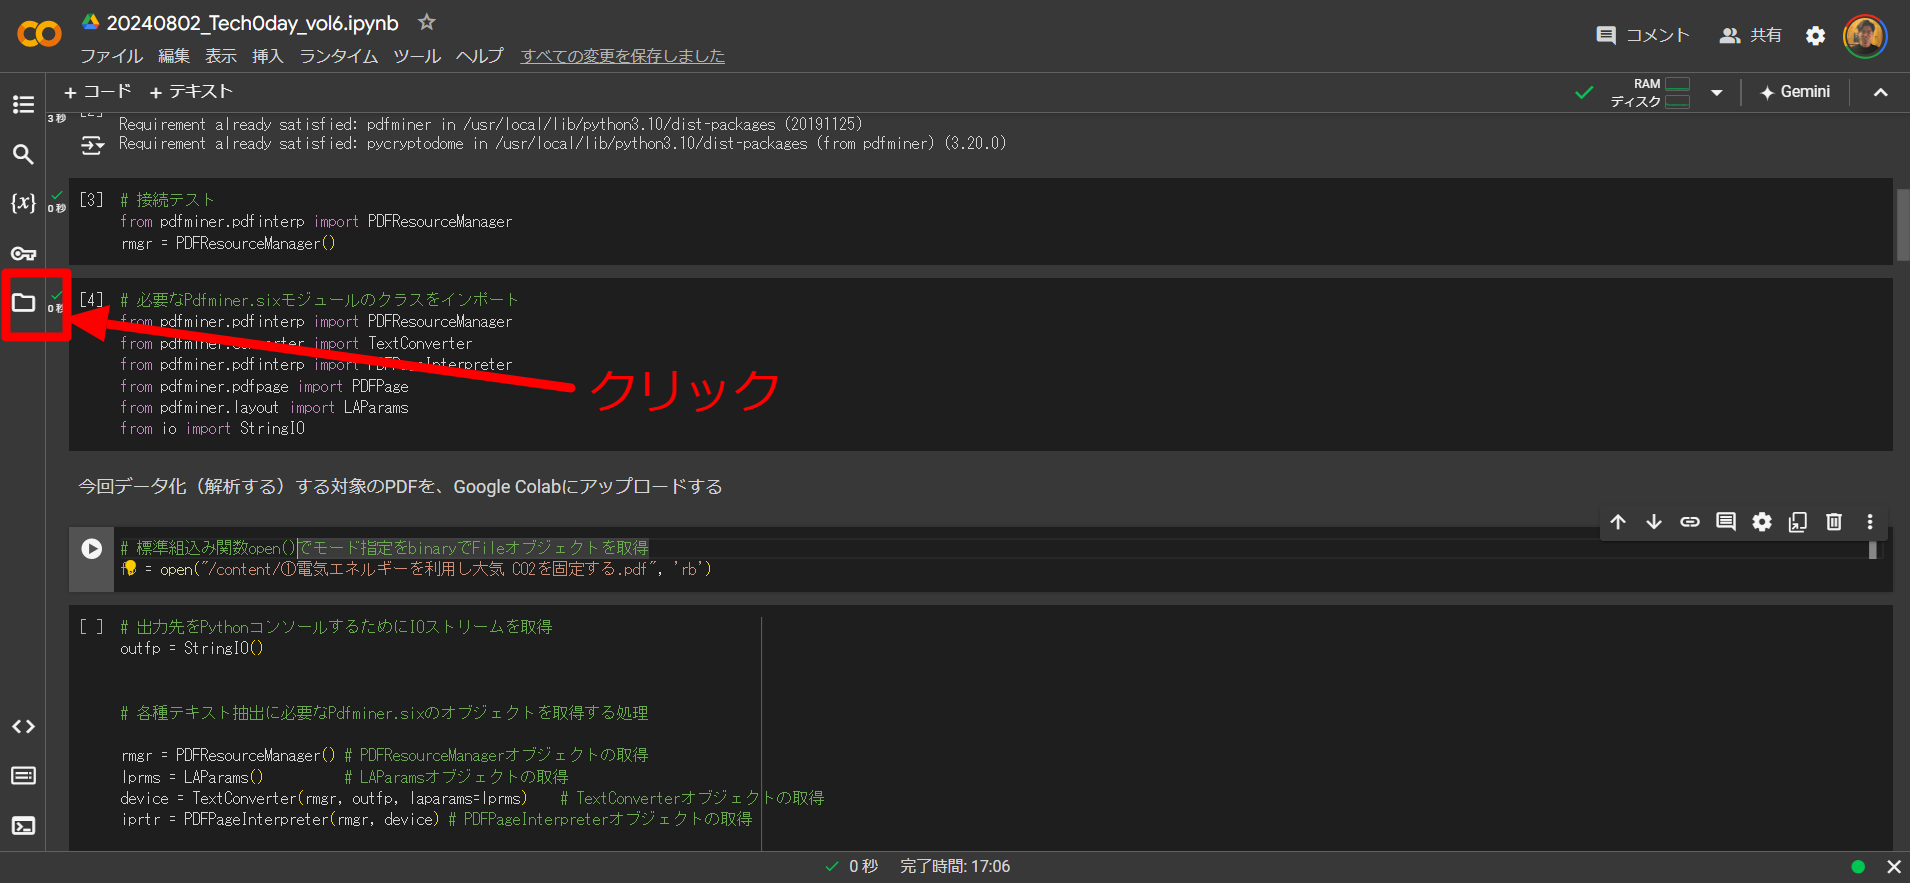

## ②test.pdfフォルダの中身をすべてアップロードする

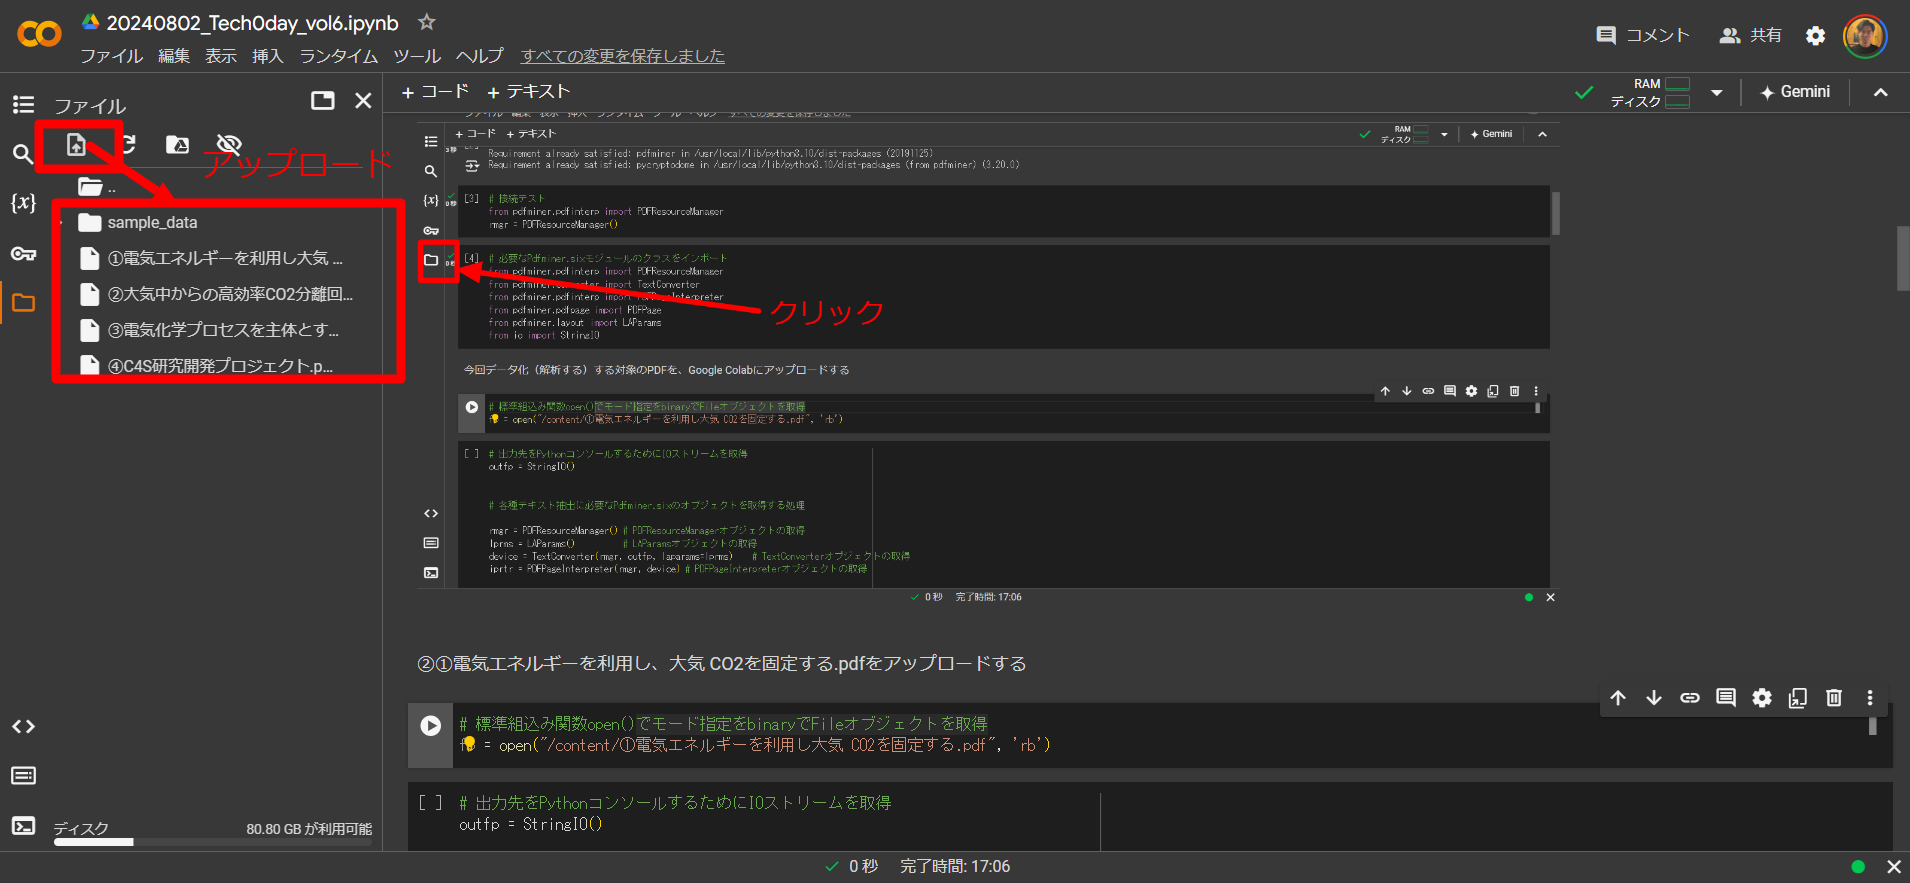

In [ ]:
# 標準組込み関数open()でモード指定をbinaryでFileオブジェクトを取得
fp = open("/content/①電気エネルギーを利用し大気 CO2を固定する.pdf", 'rb')

# **よく出くわすエラーの原因**





## **1.   ファイルの格納先が、sample_dataの中に入っている**

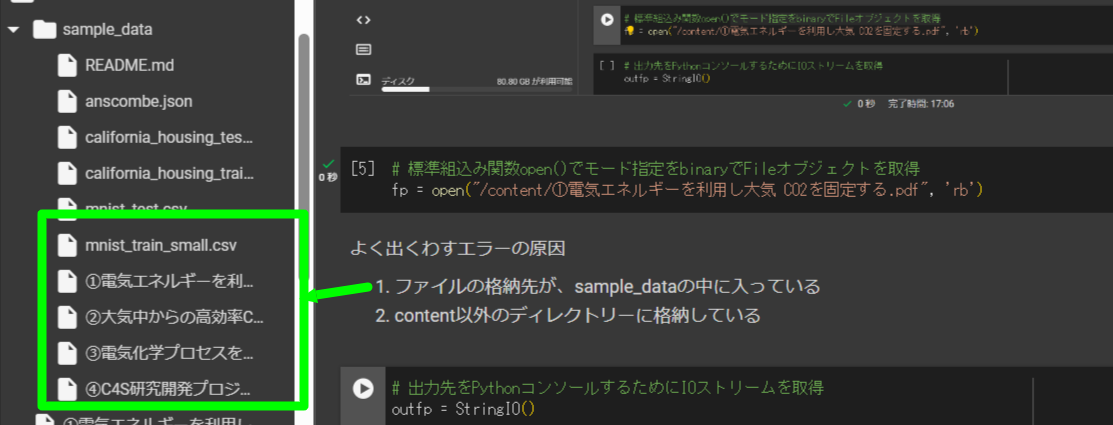


## **2.   content以外のディレクトリーに格納している**

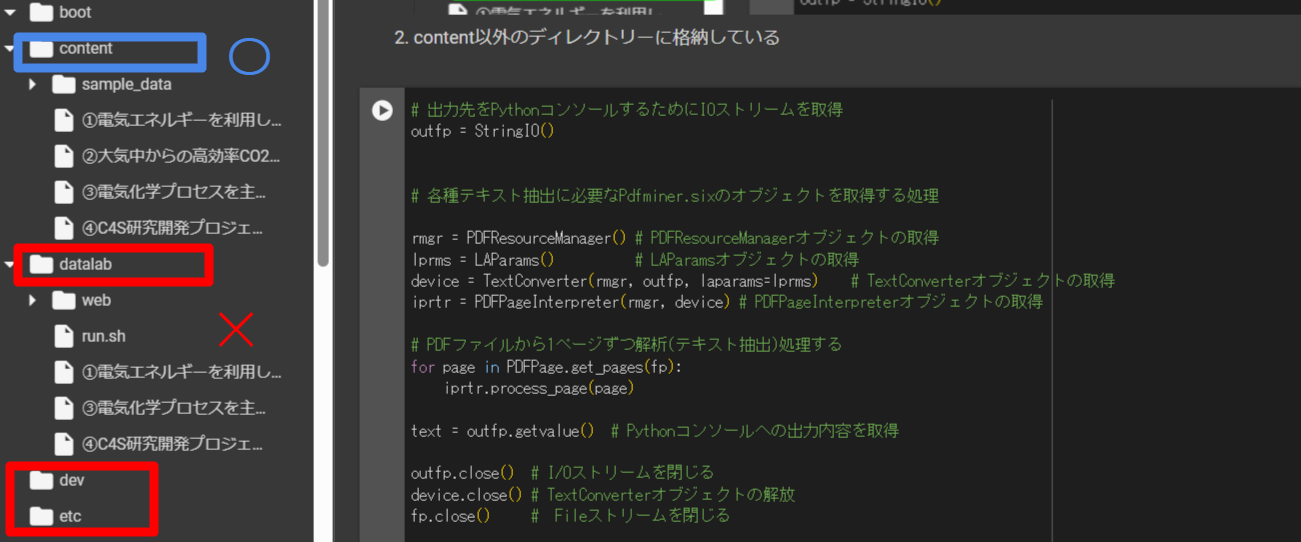


## PDFの中身を解析

In [ ]:
# 出力先をPythonコンソールするためにIOストリームを取得
outfp = StringIO()


# 各種テキスト抽出に必要なPdfminer.sixのオブジェクトを取得する処理

rmgr = PDFResourceManager() # PDFResourceManagerオブジェクトの取得
lprms = LAParams()          # LAParamsオブジェクトの取得
device = TextConverter(rmgr, outfp, laparams=lprms)    # TextConverterオブジェクトの取得
iprtr = PDFPageInterpreter(rmgr, device) # PDFPageInterpreterオブジェクトの取得

# PDFファイルから1ページずつ解析(テキスト抽出)処理する
for page in PDFPage.get_pages(fp):
    iprtr.process_page(page)

text = outfp.getvalue()  # Pythonコンソールへの出力内容を取得

outfp.close()  # I/Oストリームを閉じる
device.close() # TextConverterオブジェクトの解放
fp.close()     #  Fileストリームを閉じる

text  # Jupyterの出力ボックスに表示する

' \n\n電気エネルギーを利用し大気 CO2 を固定する \n\nバイオプロセスの研究開発 \n\nプロジェクトマネージャー（PM）： \n\n国立研究開発法人産業技術総合研究所  加藤創一郎 \n\n連絡先：s.katou*aist.go.jp \nメールでご連絡の際は「*」記号は「@」に置き換えてください。 \n\n \n\n研究開発概要 \n\n \n\n本プロジェクトでは、電気エネルギーを利用し大気中 CO2 を植物の 50 倍以上の効率で有用有機物に変換\n可能な微生物を用いた革新的なネガティブエミッション技術を開発し、日本ならびに地球規模での CO2 削\n減に大きく貢献し地球温暖化問題を解決することを最終的な目的とする。本プロジェクトでは「電気利用\nCO2 固定微生物の人工合成」と「気相反応バイオプロセスの構築」を実現し、本技術の実証可能性を明確\nに示すことを目的とする。本プロジェクトでは生分解プラスチック原料となるポリヒドロキシアルカン酸\nの生産菌としてすでに広く利用されている Ralstonia eutorophaをプラットフォーム生物として使用する。\nRalstoniaは基本的な遺伝子操作のツールは備わっているが、大規模ゲノム操作の適用例はないため、本プ\nロジェクトでは Ralstoniaの大規模ゲノム操作の基盤技術を開発する。その技術を活用し、合成生物学的\nアプローチにより電気エネルギー利用能、大気 CO2 の取込み・濃縮能、高い CO2 固定能を Ralstoniaに付\n与することで、電気エネルギーと CO2 から有用有機物を生産可能なスーパー微生物を創出する。加えて、\nスーパー微生物の能力を最大限発揮するために必要となる気相反応リアクターを設計・構築する。このリ\nアクターは①微生物が電気エネルギー供給源となる電極と直接接触していること、②微生物が基質となる\nCO2 を含む気相と直接接触していること、③微生物が栄養供給や生産物の回収に必要な水相と直接接触し\nていること、の 3 要件を満たすこれまでに例のない微生物プロセスである。本プロジェクトでは理想的な\n気相・固相・液相の３相反応を実現している水素燃料電池の技術に倣い、そのノウハウを活用することで\n微生物の電気化学的 CO2 固定反応を高速化するバイオリアクターを

## 解析したデータの整備（クレンジング）

In [ ]:
# テキストデータ内の不要な改行やスペースを削除
import re
def normalize_text(s, sep_token = " \n "):
    s = re.sub(r'\s+',  ' ', s).strip()
    s = re.sub(r". ,","",s)
    # remove all instances of multiple spaces
    s = s.replace("..",".")
    s = s.replace(". .",".")
    s = s.replace("\n", "")
    s = s.strip()
    return s
re_text=normalize_text(text)
re_text

'電気エネルギーを利用し大気 CO2 を固定する バイオプロセスの研究開発 プロジェクトマネージャー（PM）： 国立研究開発法人産業技術総合研究所 加藤創一郎 連絡先：s.katou*aist.go.jp メールでご連絡の際は「*」記号は「@」に置き換えてください。 研究開発概要 本プロジェクトでは、電気エネルギーを利用し大気中 CO2 を植物の 50 倍以上の効率で有用有機物に変換 可能な微生物を用いた革新的なネガティブエミッション技術を開発し、日本ならびに地球規模での CO2 削 減に大きく貢献し地球温暖化問題を解決することを最終的な目的とする。本プロジェクトでは「電気利用 CO2 固定微生物の人工合成」と「気相反応バイオプロセスの構築」を実現し、本技術の実証可能性を明確 に示すことを目的とする。本プロジェクトでは生分解プラスチック原料となるポリヒドロキシアルカン酸 の生産菌としてすでに広く利用されている Ralstonia eutorophaをプラットフォーム生物として使用する。 Ralstoniaは基本的な遺伝子操作のツールは備わっているが、大規模ゲノム操作の適用例はないため、本プ ロジェクトでは Ralstoniaの大規模ゲノム操作の基盤技術を開発する。その技術を活用し、合成生物学的 アプローチにより電気エネルギー利用能、大気 CO2 の取込み・濃縮能、高い CO2 固定能を Ralstoniaに付 与することで、電気エネルギーと CO2 から有用有機物を生産可能なスーパー微生物を創出する。加えて、 スーパー微生物の能力を最大限発揮するために必要となる気相反応リアクターを設計・構築する。このリ アクターは①微生物が電気エネルギー供給源となる電極と直接接触していること、②微生物が基質となる CO2 を含む気相と直接接触していること、③微生物が栄養供給や生産物の回収に必要な水相と直接接触し ていること、の 3 要件を満たすこれまでに例のない微生物プロセスである。本プロジェクトでは理想的な 気相・固相・液相の３相反応を実現している水素燃料電池の技術に倣い、そのノウハウを活用することで 微生物の電気化学的 CO2 固定反応を高速化するバイオリアクターを開発する。 2030 年までの KPI 2022 年度：Ralstoniaに、①電流消費活性、②CO2 取込み・濃

## ここまでの処理をすべてのPDFファイルに適応

In [ ]:
import glob

#ファイル名をすべて取得
files = glob.glob("/content//*.pdf")
urls = []
for file in files:
    urls.append(file)

texts = []
titles = []

# すべてのファイルからテキストデータを抽出
for url in urls:
    fp = open(url, 'rb')
    # 各種テキスト抽出に必要なPdfminer.sixのオブジェクトを取得する処理
    # 出力先をPythonコンソールするためにIOストリームを取得
    outfp = StringIO()

    rmgr = PDFResourceManager() # PDFResourceManagerオブジェクトの取得
    lprms = LAParams()          # LAParamsオブジェクトの取得
    device = TextConverter(rmgr, outfp, laparams=lprms)    # TextConverterオブジェクトの取得
    iprtr = PDFPageInterpreter(rmgr, device) # PDFPageInterpreterオブジェクトの取得

    # PDFファイルから1ページずつ解析(テキスト抽出)処理する
    for page in PDFPage.get_pages(fp):
        iprtr.process_page(page)

    text = outfp.getvalue()  # Pythonコンソールへの出力内容を取得

    outfp.close()  # I/Oストリームを閉じる
    device.close() # TextConverterオブジェクトの解放
    fp.close()     #  Fileストリームを閉じる

    # 不要なスペースなどを除去
    text=normalize_text(text)
    texts.append(text)
    title= url.replace("/content/", "").replace(".pdf", "")
    titles.append(title)

## データとして整備する

In [ ]:
import pandas as pd

In [ ]:
# DataFrameを作成
df = pd.DataFrame({
    'Title': titles,
    'Text': texts,
    'Url':urls
})
df

,Title,Text,Url
0,③電気化学プロセスを主体とする,電気化学プロセスを主体とする 革新的CO2大量資源化システムの開発 プロジェクトマネージャー...,/content/③電気化学プロセスを主体とする.pdf
1,①電気エネルギーを利用し大気 CO2を固定する,電気エネルギーを利用し大気 CO2 を固定する バイオプロセスの研究開発 プロジェクトマネー...,/content/①電気エネルギーを利用し大気 CO2を固定する.pdf
2,④C4S研究開発プロジェクト,C4S*研究開発プロジェクト ＊C 4S: Calcium Carbonate Circul...,/content/④C4S研究開発プロジェクト.pdf
3,②大気中からの高効率CO2分離回収・炭素循環技術の開発,大気中からの高効率CO2分離回収・炭素循環技術の開発 プロジェクトマネージャー（PM）：金沢...,/content/②大気中からの高効率CO2分離回収・炭素循環技術の開発.pdf


## **2.データ化したPDFをベクトルに変換する**

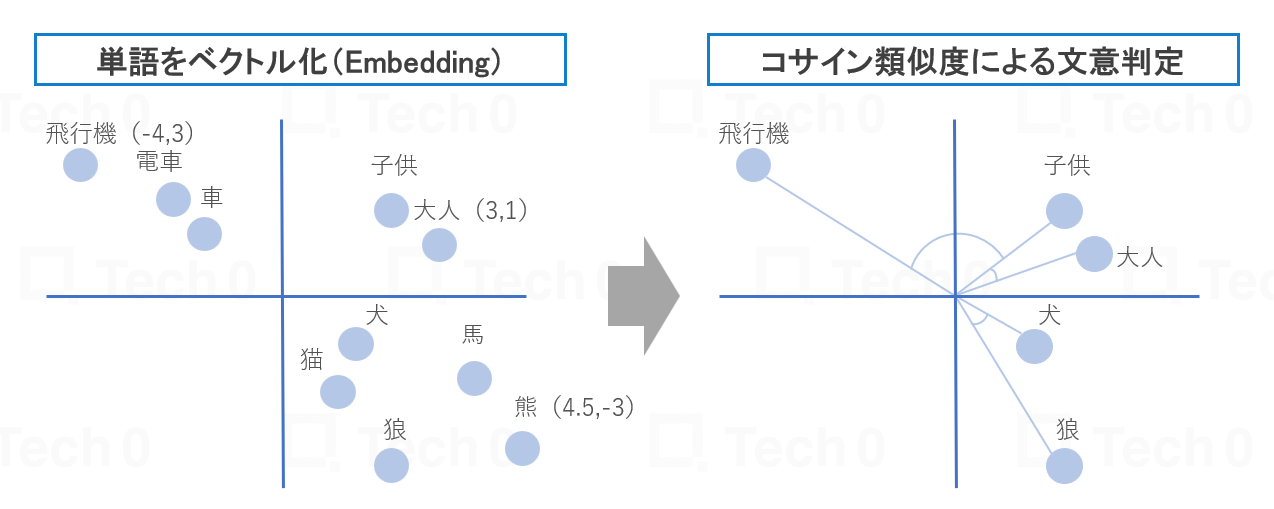


In [1]:
pip install num2words tiktoken openai

  Preparing metadata (setup.py) ... done
ERROR: Operation cancelled by user


In [ ]:
import os
import re
import requests
import sys
from num2words import num2words
import os
import pandas as pd
import numpy as np
import tiktoken
from openai import AzureOpenAI

In [ ]:
# トークン制限 (8,192 トークン) に対して長すぎる法案を削除する必要があります。
tokenizer = tiktoken.get_encoding("cl100k_base")
df['n_tokens'] = df["Text"].apply(lambda x: len(tokenizer.encode(x)))
df = df[df.n_tokens<8192]
len(df)

4

In [ ]:
client = AzureOpenAI(
  api_key = "72039338d57545a39c27de7977d2ffc1",
  api_version = "2023-05-15",
  azure_endpoint = "https://tech0-gpt-event-westus.openai.azure.com/"
)

def generate_embeddings(text, model="techo-event"): # model = "deployment_name"
    return client.embeddings.create(input = [text], model=model).data[0].embedding

df['ada_v2'] = df["Text"].apply(lambda x : generate_embeddings (x, model = 'tech0-event'))
# model should be set to the deployment name you chose when you deployed the text-embedding-ada-002 (Version 2) model
df

,Title,Text,Url,n_tokens,ada_v2
0,③電気化学プロセスを主体とする,電気化学プロセスを主体とする 革新的CO2大量資源化システムの開発 プロジェクトマネージャー...,/content/③電気化学プロセスを主体とする.pdf,1271,"[-0.014094308018684387, 0.0030962286982685328,..."
1,①電気エネルギーを利用し大気 CO2を固定する,電気エネルギーを利用し大気 CO2 を固定する バイオプロセスの研究開発 プロジェクトマネー...,/content/①電気エネルギーを利用し大気 CO2を固定する.pdf,1269,"[-0.01761901006102562, -0.005660421214997768, ..."
2,④C4S研究開発プロジェクト,C4S*研究開発プロジェクト ＊C 4S: Calcium Carbonate Circul...,/content/④C4S研究開発プロジェクト.pdf,1861,"[0.0032961107790470123, 0.02678319625556469, -..."
3,②大気中からの高効率CO2分離回収・炭素循環技術の開発,大気中からの高効率CO2分離回収・炭素循環技術の開発 プロジェクトマネージャー（PM）：金沢...,/content/②大気中からの高効率CO2分離回収・炭素循環技術の開発.pdf,1602,"[-0.013906879350543022, 0.009329849854111671, ..."


### ベクトルデータを使って、ベクトル検索を実施

In [ ]:
def cosine_similarity(a, b):
    return np.dot(a, b) / (np.linalg.norm(a) * np.linalg.norm(b))

def get_embedding(text, model="tech0-event"): # model = "deployment_name"
    return client.embeddings.create(input = [text], model=model).data[0].embedding

def search_docs(df, user_query, top_n=4, to_print=True):
    embedding = get_embedding(
        user_query,
        model="tech0-event"
        # model should be set to the deployment name you chose when you deployed the text-embedding-ada-002 (Version 2) model
    )
    # ここでuserが入力した文章（embeddingに格納）と、dfのベクトルデータとの類似性を計算し、similaritiesに格納している
    df["similarities"] = df.ada_v2.apply(lambda x: cosine_similarity(x, embedding))
    # さらに、similaritiesを上位順番に並び替えて、それをresとして保存。
    res = (
        df.sort_values("similarities", ascending=False)
        .head(top_n)
    )
    if to_print:
        display(res)
    return res


res = search_docs(df, "酸化還元反応を活用した研究はありますか？", top_n=5)

,Title,Text,Url,n_tokens,ada_v2,similarities
0,③電気化学プロセスを主体とする,電気化学プロセスを主体とする 革新的CO2大量資源化システムの開発 プロジェクトマネージャー...,/content/③電気化学プロセスを主体とする.pdf,1271,"[-0.014094308018684387, 0.0030962286982685328,...",0.830027
1,①電気エネルギーを利用し大気 CO2を固定する,電気エネルギーを利用し大気 CO2 を固定する バイオプロセスの研究開発 プロジェクトマネー...,/content/①電気エネルギーを利用し大気 CO2を固定する.pdf,1269,"[-0.01761901006102562, -0.005660421214997768, ...",0.822472
3,②大気中からの高効率CO2分離回収・炭素循環技術の開発,大気中からの高効率CO2分離回収・炭素循環技術の開発 プロジェクトマネージャー（PM）：金沢...,/content/②大気中からの高効率CO2分離回収・炭素循環技術の開発.pdf,1602,"[-0.013906879350543022, 0.009329849854111671, ...",0.815445
2,④C4S研究開発プロジェクト,C4S*研究開発プロジェクト ＊C 4S: Calcium Carbonate Circul...,/content/④C4S研究開発プロジェクト.pdf,1861,"[0.0032961107790470123, 0.02678319625556469, -...",0.789238


## これで一旦ベクトル類似性検索自体は可能な状態

In [ ]:
elems= []
for i in range (0,3):
    elem = res.iloc[i]["Text"]
    elems.append(elem)
# 見出しを付けて結合
combined_text = "A: " + elems[0] + " B: " + elems[1] + " C: " + elems[2]

## 3.OpenAIのAPIを組みわせてRAGを実践

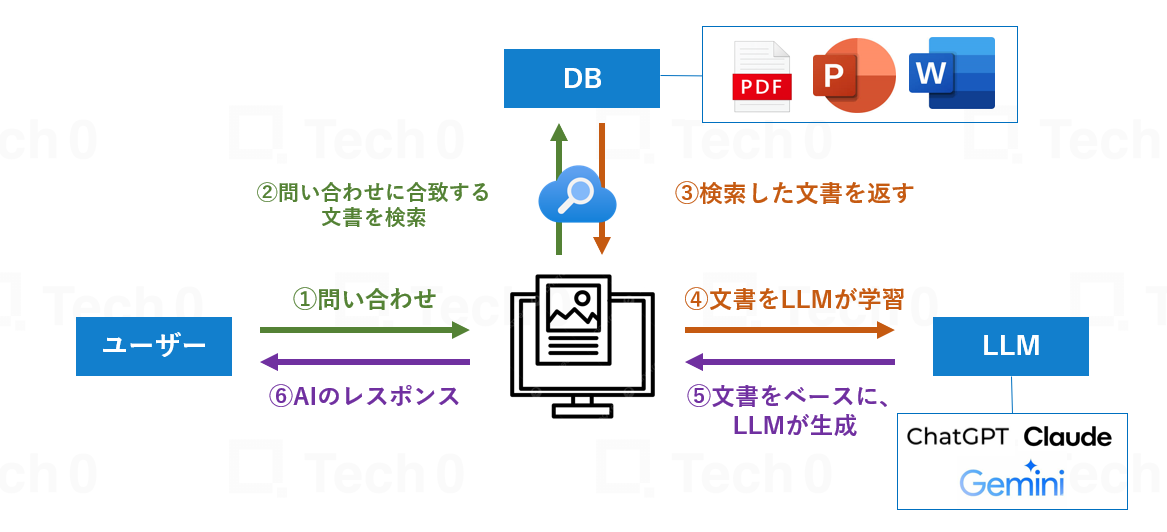

In [ ]:
user_query = "酸化還元反応を活用した研究はありますか？"
def create_summary(user_query,text):
    response = client.chat.completions.create(
        model="gpt-4", # model = "deployment_name".
        messages=[
            {"role": "system", "content": "あなたは経験豊富な理系研究員です。"},
            {"role": "user", "content": f"次に示すものは検索したワード「{user_query}」に関連性が高いと思われるA、B、C三つの研究情報です。"},
            {"role": "assistant", "content": "それぞれ背景情報を含めて簡単なサマリーを、専門外の研究員が読んでも理解ができるように簡単な内容にして提供してください。\
            このとき、検索したワードに何が関連しているのかを明確にしてください。"},
            {"role": "user", "content": text}
        ]
    )
    res = response.choices[0].message.content
    return res

res = create_summary(user_query,combined_text)
print(res)

以下は、A、B、およびCの酸化還元反応に関連する研究項目のサマリーです。各研究の背景と概要を専門用語をできるだけ減らし、一般の研究員にも分かりやすい形で説明します。

A: 「革新的CO2大量資源化システム」の開発
専門外の研究員向けの概説：
大気中に放出されている二酸化炭素（CO2）を有効なリソースに変換しようとするプロジェクトです。ここでのポイントは、捕まえたCO2を特定の化学物質（エチレンなど）に変えるために電気化学プロセスを利用することです。エチレンはプラスチックなど多くの製品の原料となります。このプロセスは再生可能エネルギーを使い、小規模でどこにでも設置可能であることが特徴です。この研究は、酸化還元反応を用いる電気化学的手法でCO2を分離・回収し、そこからエチレンを製造しようとする取り組みです。

B: 「大気中CO2を固定するバイオプロセス」の研究開発
専門外の研究員向けの概説：
このプロジェクトは、電気エネルギーを使って、大気中のCO2を特定の微生物を使用して有機物に変換する技術を開発することを目標としています。これにより、CO2排出削減への貢献と温暖化問題の解決が期待されます。この研究では、Ralstonia eutorophaという特定の微生物を改良し、この微生物が電気エネルギーを使って効率よくCO2を固定する能力を持たせることを目指しています。酸化還元反応は、微生物がCO2を固定する過程において重要な役割を果たします。

C:「大気中からの高効率CO2分離回収・炭素循環技術」の開発
専門外の研究員向けの概説：
これは、空気から直接CO2を集めて、そのCO2を他の物質に変える技術の開発を目的としたプロジェクトです。このプロジェクトでは、CO2を効率よく集める新しい物質やシステムの開発、そして集めたCO2を液体燃料などの価値のある物に変換する技術の開発が行われています。ここでの酸化還元反応は、変換プロセスの中核で、CO2を燃料などに変える際に利用されます。また、環境への影響や経済性を評価するためのLCA（ライフサイクルアセスメント）も重要な役割を果たします。

これらのプロジェクトは、酸化還元反応を用いてCO2を資源として再利用し、また地球温暖化問題に取り組むために、非常に関連が深いと考えられます。
